In [ ]:
#import sys

#from IPython.display import Image, display
#if 'google.colab' in sys.modules:
#    from google.colab import drive
#    drive.mount('/content/drive')

#%cd '/content/drive/MyDrive/Inteligencia Artificial y Aprendizaje Maquinal/IA - Clases de Práctica/ContenidosPorTemas'

Mounted at /content/drive
/content/drive/MyDrive/Inteligencia Artificial/IA - Clases de Práctica/ContenidosPorTemas


# Perceptrón Simple


Un Perceptrón simple (PS) es la red neuronal más sencilla que se puede considerar, está conformado por una sola neurona que posee N entradas y una función de transferencia de tipo umbral, tal como se ve en la siguiente figura:

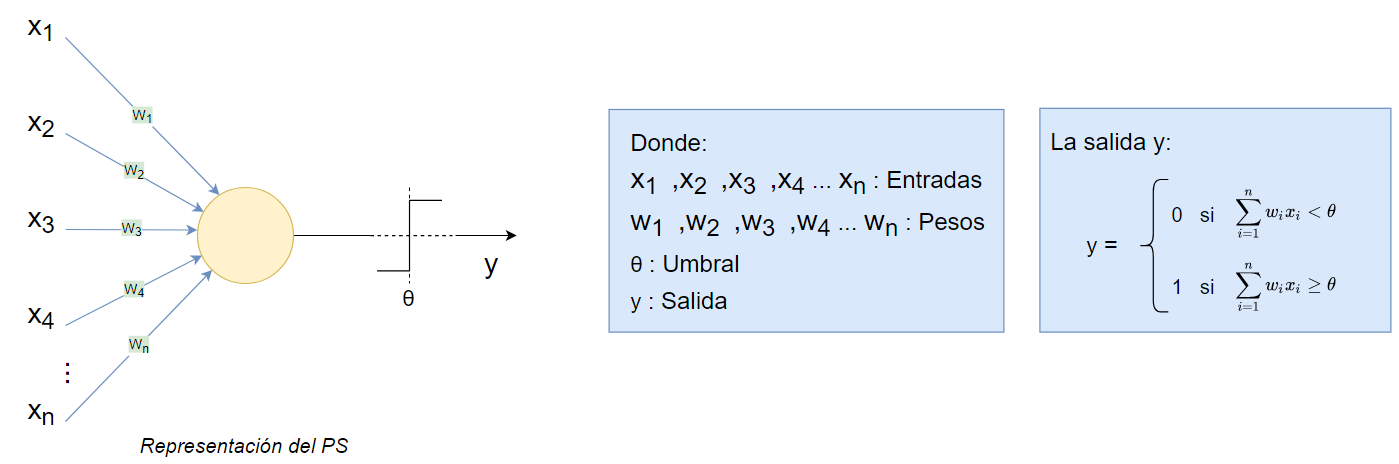

In [ ]:
#display(Image(filename='./2_imagenes/perceptron.png', width=1000))

Haciendo un pequeño cambio y llevando el umbral $\theta$ hacia la izquierda en las ecuaciones anteriores, podemos definir un nuevo peso
$w_0$ y la entrada $x_0 = 1$ para poder escribir la salida de forma más compacta:

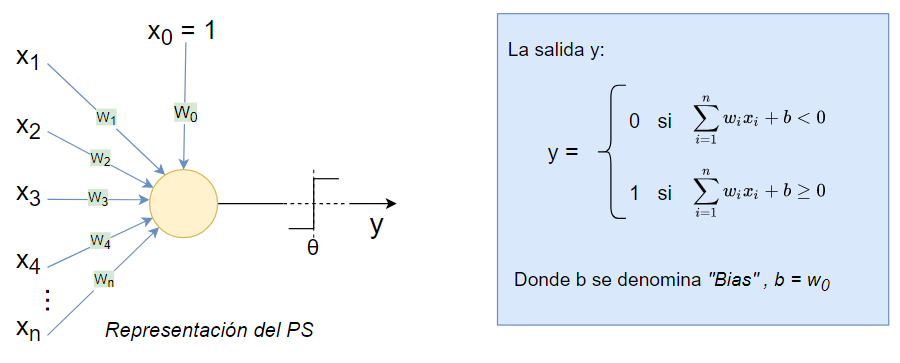

In [ ]:
#display(Image(filename='./2_imagenes/perceptron_bias.png', width=1000))

Podemos representar la salida con la siguiente expresión: $$y = sign(\sum\limits_{i=0}^N {x_i w_i})$$

_**sign**_ corresponde a la función signo y es la _función de activación_ del perceptrón simple. Más adelante veremos que existen otras funciones de activación para otras aplicaciones.

El PS permite resolver problemas linealmente separables mediante una recta o un hiperplano de separación con ordenada al origen distinta de cero gracias al término de _Bias_

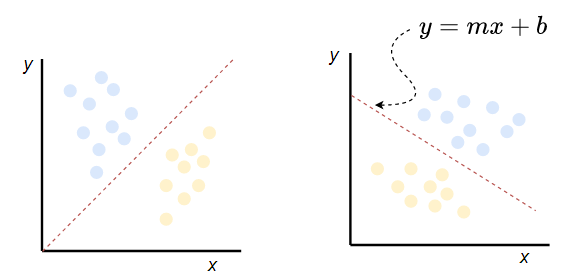

In [ ]:
#display(Image(filename='./2_imagenes/lineal_separable.png', width=700))

A continuación, vamos a implementar la _clase Perceptron_ y el algoritmo de entrenamiento o _Regla del Perceptrón Simple_ 🙂

Esta regla puede implementarse siguiendo estos pasos:
1. Inicializar el vector de pesos w con valores aleatorios entre 0 y 1.
2. Presentar un patrón de entrada x y calcular la salida o predicción $$y_{pred} = sign(x_0 w_0 + \sum\limits_{i=1}^N {x_i w_i})$$  Recordemos que $w_0$ es el término correspondiente al bias y $x_0=1$, podemos representar la suma de productos usando un producto punto entre vectores: $$y_{pred} = sign( w_0 + \vec{w}^T \cdot \vec{x})$$

3. Calcular el error entre la salida obtenida y la salida real $y_{real}$ $$e = y_{pred} - y_{real}$$
4. Ajustar los pesos de la red con la siguiente ecuación: $$ \vec{w} = \vec{w} + \mu \vec{e} \cdot \vec{x}$$ $\mu$ es el coeficiente de aprendizaje o factor de entrenamiento (eta)

(vector w[1:]= vector W[1:] + ue vector X //// W0 = W0 + ue)


5. Volver al paso 2 y repetir el proceso hasta terminar el número de iteraciones

In [1]:
# Librerías a importar
import numpy as np
from numpy.random import RandomState
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
class Perceptron(object):
    """Perceptrón simple.

    Parámetros
    ------------
    eta : float
        factor de entrenamiento (entre 0.0 y 1.0)
    epocas : int
        iteraciones para el entrenamiento.
    random_state : int
        Semilla generadora de números aleatorios para la inicialización de los pesos.

    Atributos
    -----------
    w_ : 1d-array
        Pesos despues del entrenamiento.
    mal_clasificados_ : list
        Número de desaciertos en cada época
    """
    def __init__(self, eta=0.001, epocas=1, random_state=None):
        self.eta = eta
        self.epocas = epocas
        self.random_state = random_state

    def fit(self, X, y):
        """Función de entrenamiento.
        Parameters
        ----------
        X : array, shape = [n_muestras, n_caracteristicas]
          vector de entrenamiento
        y : array, shape = [n_muestras]
          vector target.

        Returns
        -------
        self : objeto

        """
        if self.random_state is not None:
            rgen = RandomState(self.random_state)
        else:
            rgen = RandomState()

        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.mal_clasificados_ = []
        self.errores_ = []

        for _ in range(self.epocas):
            errores = 0
            error_total = 0

            for xi, target in zip(X, y):
                salida = self.predict(xi)
                error = target - salida
                actualizacion = self.eta * error
                self.w_[1:] += actualizacion * xi
                self.w_[0] += actualizacion

                errores += int(actualizacion != 0.0)
                error_total += error**2

            self.mal_clasificados_.append(errores)
            self.errores_.append(error_total / len(y))

        return self

    def calcular_entrada(self, x):
        """cálculo de la entrada al perceptrón"""
        return np.dot(x, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """devuelve la etiqueta de la clase pertenciente después de aplicar la fn. de activación"""
        return np.sign(self.calcular_entrada(X))


In [5]:
#ejemplo
X = np.array([[0, 0],
                [0, 1],
                [1, 0],
                [1, 1]])
y = np.array([-1, -1, -1, 1])  # Etiquetas esperadas (0 -> -1, 1 -> 1)

#Inicializamos el perceptrón
perceptron = Perceptron(eta=0.2, epocas=10, random_state=1)

#Entrenamos el modelo
perceptron.fit(X, y)

#Hacemos predicciones
print("Pesos ajustados:", perceptron.w_)
print("Predicciones:", perceptron.predict(X))
print("Errores en cada época:", perceptron.mal_clasificados_)

Pesos ajustados: [-1.18375655  0.79388244  0.39471828]
Predicciones: [-1. -1. -1.  1.]
Errores en cada época: [2, 3, 3, 2, 1, 0, 0, 0, 0, 0]


## Dataset Iris
El conjunto de datos flor Iris contiene 50 muestras de cada una de tres especies de Iris (Iris setosa, Iris versicolor e Iris virginica), en total 150 muestras. Se tienen 4 características: el largo y ancho del sépalo y pétalo, en centímetros.

In [13]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)

df = df[df[4].isin(['Iris-setosa', 'Iris-versicolor'])]

# Graficamos el Dataset

Separe los datos en predictores (`X`) y etiquetas (`y`). Considere sólo las clases `setosa`y `versicolor` y los atributos de la primer y tercera columnas como características de entrada, Largo de sépalo (primer columna) y largo de pétalo (tercer columna). Grafique los datos.

In [17]:
#convertimos las etiquetas de clases en  0 (Iris-setosa)  y 1 (Iris-versicolor)
X_train = df.iloc[:, [0, 2]].values
y_train = df[4].map({'Iris-setosa': 0, 'Iris-versicolor': 1}).values

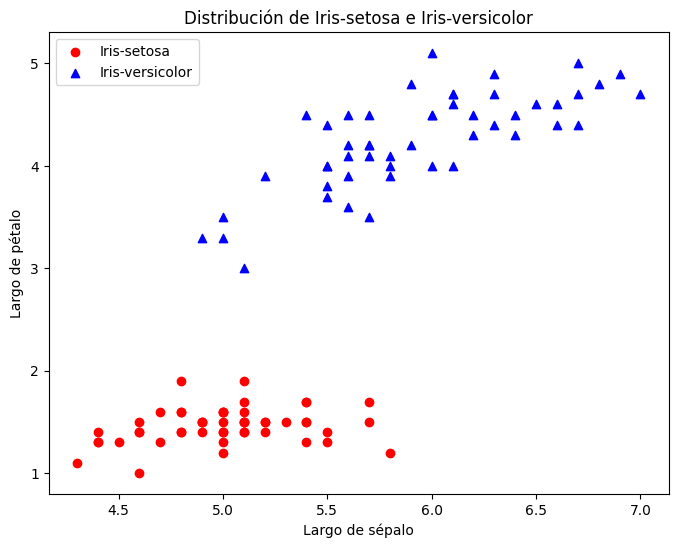

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

plt.scatter(X_train[y_train == 0].iloc[:, 0], X_train[y_train == 0].iloc[:, 1],
            color='red', marker='o', label='Iris-setosa')

plt.scatter(X_train[y_train == 1].iloc[:, 0], X_train[y_train == 1].iloc[:, 1],
            color='blue', marker='^', label='Iris-versicolor')

plt.xlabel('Largo de sépalo')
plt.ylabel('Largo de pétalo')

plt.title('Distribución de Iris-setosa e Iris-versicolor')
plt.legend(loc='upper left')

plt.show()

# Entrenamiento del Perceptrón

Utilice la clase implementada para entrenar el perceptrón, pruebe con diferentes valores de coeficiente de entrenamiento y número de épocas.

Haga un gráfico de los mal clasificados por época en función de las épocas y una gráfica de los errores de entrenamiento en cada iteración.

In [15]:
perceptron = Perceptron(eta=0.1, epocas=10, random_state=42)

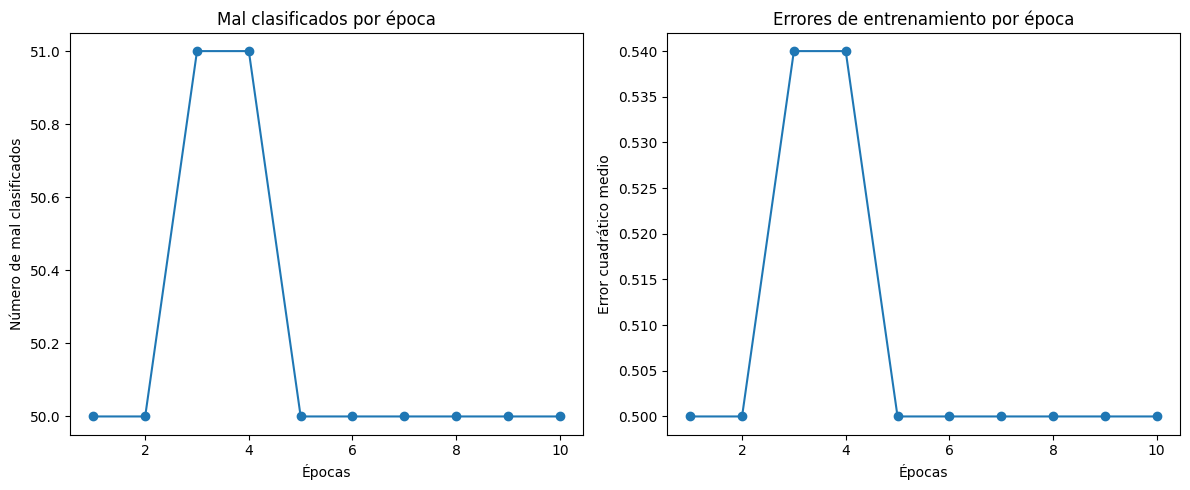

In [18]:
#llamo al método fit
perceptron.fit(X_train, y_train)

#Grafico el número de errores o mal clasificados en cada iteración
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(1, len(perceptron.mal_clasificados_) + 1), perceptron.mal_clasificados_, marker='o')
plt.xlabel('Épocas')
plt.ylabel('Número de mal clasificados')
plt.title('Mal clasificados por época')

#Grafico el número de errores por época
plt.subplot(1, 2, 2)
plt.plot(range(1, len(perceptron.errores_) + 1), perceptron.errores_, marker='o')
plt.xlabel('Épocas')
plt.ylabel('Error cuadrático medio')
plt.title('Errores de entrenamiento por época')

plt.tight_layout()
plt.show()

Recordemos la ecuación: $$y_{pred} = sign(w_0 + \sum\limits_{i=1}^N {x_i w_i})$$

Para este problema con dos características (x1 = longitudes del sépalo y x2= longitudes de pétalo ), la ecuación resulta:

$$y_{pred} = sign(x_1 w_1 + x_2 w_2 + w_0)$$

Donde se separan las dos clases de flores, tendremos la frontera de decisión, dada por la ecuación:

$$x_1 w_1 + x_2 w_2 + w_0 = 0$$

De esta ecuación podemos despejar la recta $x_2$ en función de $x_1$ que separa las clases en el espacio de soluciones

$$x_2 + x_1 \frac{w_1}{w_2} + \frac{w_0}{w_2} = 0$$

$$x_2 =  -\frac{w_1}{w_2}x_1 - \frac{w_0}{w_2} $$

La pendiente de la recta  $ m = -\frac{w_1}{w_2}$ y la ordenada al origen $ b = - \frac{w_0}{w_2}$

### Ahora vamos a graficar esta recta

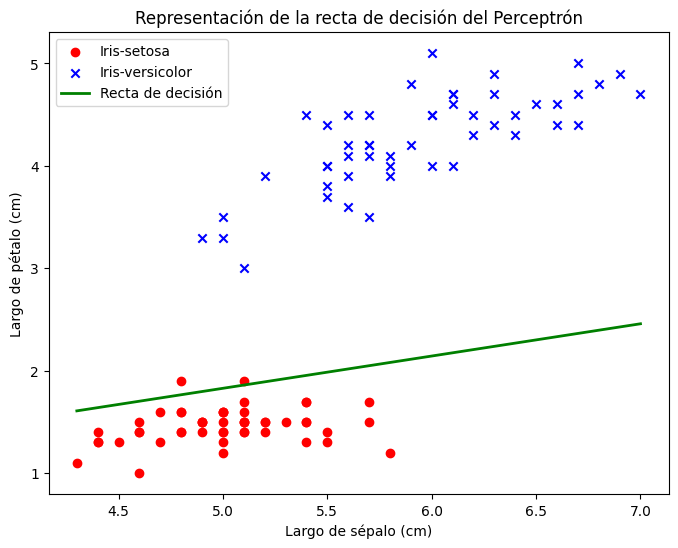

In [19]:
#------------------ Representación de la recta ------------------------------------
# vector de pesos del perceptrón entrenado
w = perceptron.w_

# cálculo de la pendiente
pendiente = -w[1] / w[2]

# cálculo de la ordenada al origen
ordenada_origen = -w[0] / w[2]

# armo la recta y la grafico junto a los datos
plt.figure(figsize=(8, 6))
plt.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], color='red', marker='o', label='Iris-setosa')
plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], color='blue', marker='x', label='Iris-versicolor')

# Generar valores de x para la recta
x_values = np.linspace(X_train[:, 0].min(), X_train[:, 0].max(), 100)
# Calcular los valores de y correspondientes
y_values = pendiente * x_values + ordenada_origen

plt.plot(x_values, y_values, color='green', linestyle='-', linewidth=2, label='Recta de decisión')
plt.xlabel('Largo de sépalo (cm)')
plt.ylabel('Largo de pétalo (cm)')
plt.legend(loc='upper left')
plt.title('Representación de la recta de decisión del Perceptrón')
plt.show()

## Perceptrón Usando scikit-learn

Ahora utilice las 3 clases del conjunto de datos usando las mismas características (atributos de la primer y tercera columnas). separe los datos en entrenamiento y prueba (20% datos de prueba), `random_state=100`

In [128]:
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split

# Convertimos las etiquetas de clases en  0 (Iris-setosa), 1 (Iris-versicolor) y 2 (Iris-virginica)
X = df.iloc[:, [0, 2]]
y = df[4].map({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica':2})

In [129]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=100)

Entrene un perceptrón simple usando la clase [Perceptron](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html) de scikit-learn.

In [130]:
perceptron = Perceptron(penalty='l1', max_iter = 1000, eta0 = 1, random_state = 42)
#tengo mis dudas al poner penalty, ya que
# 'l2' intenta minimizar la suma de los cuadrados de los pesos, favorece las soluciones cuando los pesos son pequeños y distribuidos
# 'l1' intenta minimizar la suma de los valores absolutos de los pesos, elimina algunos features
# 'none' intenta minimizar el error de prediccion, puede llevar a un sobreajuste
perceptron.fit (X_train, y_train)

Perceptron(eta0=1, penalty='l1', random_state=42)

In [131]:
y_pred = perceptron.predict(X_test)

Utilice la función plot_decision_regions para graficar las regiones de decisión de las 3 clases, grafique los datos de entrenamiento y prueba, diferenciándolos

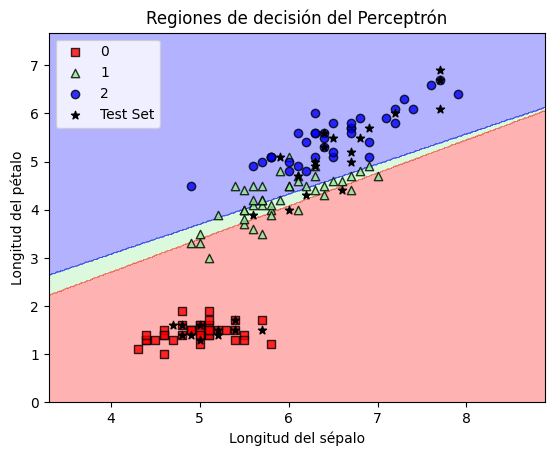

In [132]:
from modulos.graficacion import plot_decision_regions

X_train = X_train.to_numpy()
y_train = y_train.to_numpy()
X_test = X_test.to_numpy()

# Graficar las regiones de decisión
plot_decision_regions(X_train, y_train, perceptron)
plt.scatter(X_test[:, 0], X_test[:, 1], color='black', edgecolor='black', marker='*', label='Test Set')
plt.title('Regiones de decisión del Perceptrón')
plt.xlabel('Longitud del sépalo')
plt.ylabel('Longitud del pétalo')
plt.legend(loc='upper left')
plt.show()

Evalúe el desempeño del clasificador

In [133]:
from sklearn.metrics import accuracy_score
print('Precisión:', accuracy_score(y_test, y_pred))

Precisión: 0.8666666666666667


In [134]:
# Precision con penalty=None ---> 0.8
# Precision con penalty='l1' ---> 0.8666
# Precision con penalty='l2' ---> 0.8